<a href="https://colab.research.google.com/github/KhizarJamshaidIqbal/Sequential_Model/blob/main/Sequential_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import All NecessaryPackages**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

# **Connect With the GoogleDrive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Preprocessing the Data**

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/gdrive/MyDrive/PCSD_App/Dataset/Pakistan/Training',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/gdrive/MyDrive/PCSD_App/Dataset/Pakistan/Valid',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 2060 files belonging to 15 classes.
Found 986 files belonging to 15 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# **Run Epochs**

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
65/65 [==============================] - 924s 13s/step - loss: -883966.3750 - accuracy: 0.0578 - val_loss: -486485.0000 - val_accuracy: 0.0609
Epoch 2/10
65/65 [==============================] - 560s 8s/step - loss: -18930302.0000 - accuracy: 0.0583 - val_loss: -11791289.0000 - val_accuracy: 0.0609
Epoch 3/10
65/65 [==============================] - 555s 8s/step - loss: -125085072.0000 - accuracy: 0.0583 - val_loss: -56534832.0000 - val_accuracy: 0.0609
Epoch 4/10
65/65 [==============================] - 551s 8s/step - loss: -458981728.0000 - accuracy: 0.0583 - val_loss: -216916352.0000 - val_accuracy: 0.0609
Epoch 5/10
65/65 [==============================] - 564s 8s/step - loss: -1226065536.0000 - accuracy: 0.0583 - val_loss: -515797152.0000 - val_accuracy: 0.0609
Epoch 6/10
65/65 [==============================] - 558s 8s/step - loss: -2743468544.0000 - accuracy: 0.0583 - val_loss: -1502470144.0000 - val_accuracy: 0.0609
Epoch 7/10
65/65 [==============================] -

# **Loss Graphs**

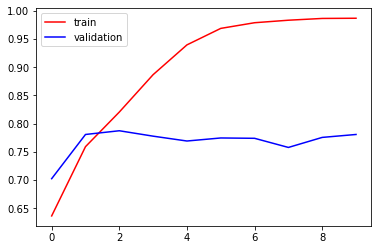

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

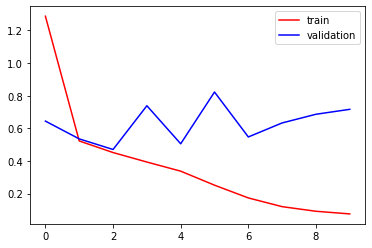

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

# **Other Steps**

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/cat.jpg')

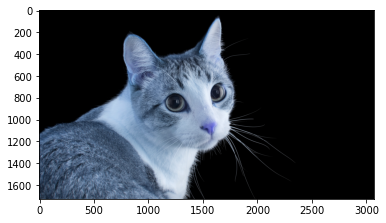

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(1728, 3072, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

array([[0.]], dtype=float32)